- 基本信息
    - 版本
    - 下划线，对象属性
    - 迭代器和生成器
    - 鸭子类型
    - 单例模式
    - 闭包
    - 面向切面编程AOP和装饰器
    - is和==
    - 新式类和经典类
- 异常
- 关键词
    - import
    - yield
    - global和nonlocal
- 数据类型
    - 类型转换
    - 自省
- 变量
    - 类变量和实例变量
    - 变量的作用域
- 对象
    - 可更改和不可更改对象
    - 面向对象
- 方法
    - 静态方法，类方法和实例方法
- 函数
    - 函数式编程和高阶函数
        - map, reduce, filter, sorted, lambda
    - zip, enumerate, bin, int, reversed, min, max, sum, eval
    - super, locals
    - 函数参数: *args和**kwargs
    - 函数重载
- 列表
    - 索引和切片
    - insert, pop, remove, id
    - IndexError
    - 基本操作
        - 利用集合找异同或者删除重复元素
        - 展平列表
            - 使用sum函数
            - 嵌套的列表可以进行递归展平
- 字典
    - 字典生成/推导式
    - 字典排序
    - `__getitem__`
    - 从列表构建字典
- 字符串
    - 内嵌函数
    - 正则表达式
    - ASCII
    - 字符串格式化
    - 字符串编码
    - 基本操作
        - 生成26个字母
- 文件及目录操作
    - shutil
    - glob
    - os
    - zipfile
    - 文件读写
- sys
- logging
- 拷贝: copy
- pickle
- zipfile
- argparse
- click
- importlib
- xlrd
- json
- datetime
- random
- itertools
- heapq
- collections
- matplotlib
- numpy
- pandas
- sklearn
- scipy
- math
- nltk
- 神经元和神经网络实现

### 基本信息

In [12]:
# python版本
import sys
print(sys.version_info)
print(sys.version_info > (3, 0))

sys.version_info(major=3, minor=7, micro=10, releaselevel='final', serial=0)
True


In [ ]:
# ImportError: No module named 'cPickle'
    # python2有cPickle，但是在python3下，是没有cPickle的
    # 将cPickle改为pickle即可

In [ ]:
# Python中单下划线和双下划线
    ## __foo__:一种约定,Python内部的名字,用来区别其他用户自定义的命名,以防冲突，就是例如__init__()/构造器(当一个实例被创建的时候初始化的方法，但是它并不是实例化调用的第一个方法，__new__才是实例化对象调用的第一个方法),__del__(),__call__()/让一个类的实例像函数一样被调用 这些特殊方法，也叫魔法方法
        # __new__是一个静态方法,而__init__是一个实例方法.
        # __new__方法会返回一个创建的实例,而__init__什么都不返回
        # 只有在__new__返回一个cls的实例时后面的__init__才能被调用
        # 当创建一个新实例时调用__new__,初始化一个实例时用__init__
        # __metaclass__是创建类时起作用.所以我们可以分别使用__metaclass__,__new__和__init__来分别在类创建,实例创建和实例初始化的时候做一些小手脚
        # __repr__(): 自定义对象输出
        # 比较:
            # def __eq__(self, other):
            #     return self.value == other.value

            # def __lt__(self, other):
            #     return self.value < other.value

            # def __ge__(self, other):
            #     return self.value >= other.value
        # 还可以重载__len__()、__str__()函数；若想要让对象成为迭代器，则使用__iter__()，这允许我们调用next()
    ## _foo:一种约定,用来指定变量私有.程序员用来指定私有变量的一种方式.不能用from module import * 导入，其他方面和公有一样访问
    ## __foo:这个有真正的意义:解析器用_classname__foo来代替这个名字,以区别和其他类相同的命名,它无法直接像公有成员一样随便访问,通过对象名._类名__xxx这样的方式可以访问.

In [ ]:
# 在类里定义__slots__ = ('name', 'age') # 用tuple定义允许绑定的属性名称，如只允许对实例添加name和age属性
# 使用__slots__要注意，__slots__定义的属性仅对当前类起作用，对继承的子类是不起作用的

In [3]:
# 面向对象中实现只读属性: 将对象私有化，通过共有方法提供一个读取数据的接口
class person:
    def __init__(self, x):
        self.__age = 10
    def age(self):
        return self.__age
t = person(22)
print(t.age())
t.__age

10


AttributeError: 'person' object has no attribute '__age'

In [11]:
class MyClass():
    def __init__(self):
        self.__superprivate = "Hello"
        self._semiprivate = ", world!"
mc = MyClass()
print(mc.__superprivate)

AttributeError: 'MyClass' object has no attribute '__superprivate'

In [12]:
print(mc._semiprivate)
print(mc.__dict__)

, world!
{'_MyClass__superprivate': 'Hello', '_semiprivate': ', world!'}


In [16]:
# 迭代器和生成器
    ## 将列表生成式中[]改成()之后数据结构是否改变？ 答案：是，从列表变为生成器
    ## 通过列表生成式，可以直接创建一个列表。但是，受到内存限制，列表容量肯定是有限的。而且，创建一个包含百万元素的列表，不仅是占用很大的内存空间，如：我们只需要访问前面的几个元素，后面大部分元素所占的空间都是浪费的。因此，没有必要创建完整的列表（节省大量内存空间）。在Python中，我们可以采用生成器：边循环，边计算的机制—>generator
L = [x*x for x in range(10)]
print(L)
g = (x*x for x in range(10))
print(g)


[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
<generator object <genexpr> at 0x7f24f217d1d0>


In [ ]:
# 鸭子类型
    ## 我们并不关心对象是什么类型，到底是不是鸭子，只关心行为。
    ## 比如在python中，有很多file-like的东西，比如StringIO,GzipFile,socket。它们有很多相同的方法，我们把它们当作文件使用。
    ## 又比如list.extend()方法中,我们并不关心它的参数是不是list,只要它是可迭代的,所以它的参数可以是list/tuple/dict/字符串/生成器等.
    ## 鸭子类型在动态语言中经常使用，非常灵活

In [ ]:
# 单例模式
    # 单例模式是一种常用的软件设计模式。在它的核心结构中只包含一个被称为单例类的特殊类。通过单例模式可以保证系统中一个类只有一个实例而且该实例易于外界访问，从而方便对实例个数的控制并节约系统资源。如果希望在系统中某个类的对象只能存在一个，单例模式是最好的解决方案。
    # __new__()在__init__()之前被调用，用于生成实例对象。利用这个方法和类的属性的特点可以实现设计模式的单例模式。单例模式是指创建唯一对象，单例模式设计的类只能实例


In [2]:
class Singleton(object): # 使用__new__方法，new是真正创建实例对象的方法，所以重写基类的new方法
    def __new__(cls, *args, **kw):
        if not hasattr(cls, '_instance'):
            orig = super(Singleton, cls)
            cls._instance = orig.__new__(cls, *args, **kw)
        return cls._instance

class MyClass(Singleton):
    pass
c1=MyClass()
c2=MyClass()
print(c1 is c2)

True


In [1]:
def singleton(cls): # 装饰器版本
    instances = {}
    def getinstance(*args, **kw):
        if cls not in instances:
            instances[cls] = cls(*args, **kw)
        return instances[cls]
    return getinstance

@singleton
class MyClass:
    pass
f1=MyClass()
f2=MyClass()
print(f1 is f2)

True


In [4]:
class Singleton(type):  # type是python的元类，元类是用于创建类对象的类，类对象创建实例对象时一定要调用call方法，因此在调用call时候保证始终只创建一个实例即可
    def __call__(cls, *args, **kwargs):
        if not hasattr(cls, '_instance'):
            cls._instance = super(Singleton, cls).__call__(*args, **kwargs)
        return cls._instance

class Foo(metaclass=Singleton):
    pass

foo1 = Foo()
foo2 = Foo()
print(foo1 is foo2)

True


In [ ]:
class My_Singleton(object): # mysingleton.py   import方法    作为python的模块是天然的单例模式
    def foo(self):
        pass

my_singleton = My_Singleton()

# to use
from mysingleton import my_singleton

my_singleton.foo()

In [ ]:
# 闭包(closure)是函数式编程的重要的语法结构。闭包也是一种组织代码的结构，它同样提高了代码的可重复使用性
    # 当一个内嵌函数引用其外部作用域的变量,我们就会得到一个闭包
    # 创建一个闭包必须满足以下几点:
        # 必须有一个内嵌函数
        # 内嵌函数必须引用外部函数中的变量
        # 外部函数的返回值必须是内嵌函数

In [4]:
# 闭包的延迟绑定
    # 内部函数被调用时，参数的值在闭包内进行查找。因此，当任何由multipliers()返回的函数被调用时,i的值将在附近的范围进行查找。那时，不管返回的函数是否被调用，for循环已经完成，i被赋予了最终的值3
def multipliers():
    return [lambda x: i*x for i in range(4)]
print([m(2) for m in multipliers()])

[6, 6, 6, 6]


In [5]:
def multipliers():
    for i in range(4):
        yield lambda x: i*x
print([m(2) for m in multipliers()])

[0, 2, 4, 6]


In [3]:
# 面向切面编程AOP(Aspect Oriented Programming)和装饰器
    # 装饰器是一个很著名的设计模式，经常被用于有切面需求的场景，较为经典的有插入日志、性能测试、事务处理等。装饰器是解决这类问题的绝佳设计，有了装饰器，我们就可以抽离出大量函数中与函数功能本身无关的雷同代码并继续重用。概括的讲，装饰器的作用就是为已经存在的对象添加额外的功能
# 装饰器
    # 写一个判断时间的装饰器
import datetime

class TimeException(Exception):
    def __init__(self, exception_info):
        super().__init__()
        self.info = exception_info

    def __str__(self):
        return self.info

def timecheck(func):
    def wrapper(*args, **kwargs):
        if datetime.datetime.now().year == 2021:
            func(*args, **kwargs)
        else:
            raise TimeException("函数已过时")

    return wrapper

@timecheck
def test(name):
    print("Hello {}, 2021 Happy".format(name))

test("backbp")

Hello backbp, 2021 Happy


In [6]:
# 计算时间的装饰器
import time
def timeit(fn): 
    # *args and **kwargs are to support positional and named arguments of fn
    def get_time(*args, **kwargs): 
        start = time.time() 
        output = fn(*args, **kwargs)
        print(f"Time taken in {fn.__name__}: {time.time() - start:.7f}")
        return output  # make sure that the decorator returns the output of fn
    return get_time 

def fib_helper(n):
    if n < 2:
        return n
    return fib_helper(n - 1) + fib_helper(n - 2)

def fib_m_helper(n, computed):
    if n in computed:
        return computed[n]
    computed[n] = fib_m_helper(n - 1, computed) + fib_m_helper(n - 2, computed)
    return computed[n]

@timeit
def fib(n):
    return fib_helper(n)

@timeit
def fib_m(n):
    return fib_m_helper(n, {0: 0, 1: 1})

fib(30)
fib_m(30)

Time taken in fib: 0.2612131
Time taken in fib_m: 0.0000117


832040

In [7]:
# 上述的memoization是缓存的一种形式，python中提供了内置装饰器让函数能够进行缓存；lru表示least recently used
import functools

@functools.lru_cache()
def fib_helper(n): # 重用之前已经计算过的数字
    if n < 2:
        return n
    return fib_helper(n - 1) + fib_helper(n - 2)

@timeit
def fib(n):
    """ fib is a wrapper function so that later we can change its behavior
    at the top level without affecting the behavior at every recursion step.
    """
    return fib_helper(n)

fib(50)
fib_m(50)

Time taken in fib: 0.0000758
Time taken in fib_m: 0.0000570


12586269025

In [ ]:
# is是对比地址,==是对比值
    # is：比较的是两个对象的id值是否相等，也就是比较俩对象是否为同一个实例对象。是否指向同一个内存地址
    # == ： 比较的两个对象的内容/值是否相等，默认会调用对象的eq()方法

In [ ]:
# python新式类和经典类的区别
    # 在python里凡是继承了object的类，都是新式类
    # python3里只有新式类
    # python2里面继承object的是新式类，没有写父类的是经典类
    # 经典类目前在python里基本没有应用
    # 保持class与type的统一: 对新式类的实例执行a.__class__与type(a)的结果是一致的，对于旧式类来说就不一样了
    # 对于多重继承的属性搜索顺序不一样: 新式类是采用广度优先搜索，旧式类采用深度优先搜索

In [ ]:
# import
    # 如: from parts import * 
    # 若在parts.py的第一行中指定__all__ = ['Encoder', 'Decoder', 'Loss']，则只会导入Encoder, Decoder, Loss
# ImportError: cannot import name 'create_T_one_hot'
    # 交叉import: a,b两个python文件，在a中import b中的类，又在b中import a中的类，就会报这种异常

In [ ]:
# "train" if train else "valid" if val else "test"

### 异常

In [ ]:
# Exception: 常规错误的基类
    # try: ... except Exception as e: ...
    # raise Exception()
# RuntimeError: 一般的运行时错误
    # raise RuntimeError()
# KeyError

# 也可使用assert bool, "print error msg"

### 关键词

In [ ]:
# import
    # 如: from parts import * 
    # 若在parts.py的第一行中指定__all__ = ['Encoder', 'Decoder', 'Loss']，则只会导入Encoder, Decoder, Loss

In [14]:
# yield: 它首先是个return，就是在程序中返回某个值，返回之后程序就不再往下运行了。看做return之后再把它看做一个是生成器（generator）的一部分（带yield的函数才是真正的迭代器）
# yield from后面加上可迭代对象，它可以把可迭代对象里的每个元素一个一个的yield出来
def foo():
    print("starting...")
    while True:
        res = yield 4
        print("res:",res)
g = foo() # 因为foo函数中有yield关键字，所以foo函数并不会真的执行，而是先得到一个生成器g(相当于一个对象)
print(next(g)) # 直到调用next方法，foo函数正式开始执行，先执行foo函数中的print方法，然后进入while循环。程序遇到yield关键字，然后把yield想想成return,return了一个4之后，程序停止，并没有执行赋值给res操作，此时next(g)语句执行完成，所以输出前两行
print("*"*20) 
print(next(g)) # 这个时候和上面那个差不多，不过不同的是，这个时候是从刚才那个next程序停止的地方开始执行的，也就是要执行res的赋值操作，这时候要注意，这个时候赋值操作的右边是没有值的（因为刚才那个是return出去了，并没有给赋值操作的左边传参数），所以这个时候res赋值是None,所以接着下面的输出就是res: None。程序会继续在while里执行，又一次碰到yield,这个时候同样return出4，然后程序停止，print函数输出的4就是这次return出的4

starting...
4
********************
res: None
4


In [ ]:
# global与nonlocal的区别
    # 第一，两者的功能不同。global关键字修饰变量后标识该变量是全局变量，对该变量进行修改就是修改全局变量，而nonlocal关键字修饰变量后标识该变量是上一级函数中的局部变量，如果上一级函数中不存在该局部变量，nonlocal位置会发生错误（最上层的函数使用nonlocal修饰变量必定会报错）
    # 第二，两者使用的范围不同。global关键字可以用在任何地方，包括最上层函数中和嵌套函数中，即使之前未定义该变量，global修饰后也可以直接使用，而nonlocal关键字只能用于嵌套函数中，并且外层函数中定义了相应的局部变量，否则会发生错误（见第一）

### 数据类型

In [ ]:
# 数据类型转换
    ## 获取整数的各位数: 将数字转换成一个字符数组(python 中的字符串)(如A = map(int, str(N)))，或者不断地把数字除以 10，取整数的最后一个数字

In [ ]:
# python自省就是面向对象的语言所写的程序在运行时,所能知道对象的类型.简单一句就是运行时能够获得对象的类型.比如type(),dir(),getattr(),hasattr(),isinstance().
    # getattr()传入对象名字和属性名称
    # dir()获取对象所有的属性和方法

In [10]:
a = [1,2,3]
b = {'a':1,'b':2,'c':3}
c = True
print(type(a),type(b),type(c)) # <type 'list'> <type 'dict'> <type 'bool'>
print(isinstance(a,list))  # True

<class 'list'> <class 'dict'> <class 'bool'>
True


### 变量

In [ ]:
# 类变量：是可在类的所有实例之间共享的值（也就是说，它们不是单独分配给每个实例的）例如下面第一个例子中，num_of_instance 就是类变量，用于跟踪存在着多少个Test的实例。
# 实例变量：实例化之后，每个实例单独拥有的变量

In [7]:
class Test(object):  
    num_of_instance = 0  
    def __init__(self, name):  
        self.name = name  
        Test.num_of_instance += 1  
  
print(Test.num_of_instance)   # 0
t1 = Test('jack')  
print(Test.num_of_instance)   # 1
t2 = Test('lucy')  
print(t1.name , t1.num_of_instance)  # jack 2
print(t2.name , t2.num_of_instance)  # lucy 2

0
1
jack 2
lucy 2


In [9]:
class Person:
    name="aaa"

p1=Person()
p2=Person()
p1.name="bbb" # 实例调用了类变量,p1.name一开始是指向的类变量name="aaa",但是在实例的作用域里把类变量的引用改变了,就变成了一个实例变量,self.name不再引用Person的类变量name了
print(p1.name)  # bbb
print(p2.name)  # aaa
print(Person.name)  # aaa

bbb
aaa
aaa


In [ ]:
class Person:
    name=[]

p1=Person()
p2=Person()
p1.name.append(1)
print(p1.name)  # [1]
print(p2.name)  # [1]
print(Person.name)  # [1]

In [ ]:
# 变量的作用域(变量查找顺序)
    # 函数作用域的LEGB顺序: L: local 函数内部作用域; E: enclosing 函数内部与内嵌函数之间; G: global 全局作用域; B: build-in 内置作用
    # python在函数里面的查找分为4种，称之为LEGB，也正是按照这顺序来查找的

### 对象

In [ ]:
# 在python中，strings, tuples, 和numbers是不可更改的对象，而 list, dict, set 等则是可以修改的对象
    # 当进行修改操作时，可变类型传递的是内存中的地址，也就是说，直接修改内存中的值，并没有开辟新的内存；不可变类型被改变时，并没有改变原内存地址中的值，而是开辟一块新的内存，将原地址中的值复制过去，对这块新开辟的内存中的值进行操作
    # 当一个引用传递给函数的时候,函数自动复制一份引用,这个函数里的引用和外边的引用没有半毛关系了.所以下面第一个例子里函数把引用指向了一个不可变对象,当函数返回的时候,外面的引用没半毛感觉.而第二个例子就不一样了,函数内的引用指向的是可变对象,对它的操作就和定位了指针地址一样,在内存里进行修改

In [4]:
a = 1
def fun(a):
    print("func_in",id(a))   
    a = 2
    print("re-point",id(a), id(2))  
print("func_out",id(a), id(1))  
fun(a)
print(a)  # 1

func_out 94867170013952 94867170013952
func_in 94867170013952
re-point 94867170013984 94867170013984
1


In [5]:
a = []
def fun(a):
    print("func_in",id(a))  
    a.append(1)
print("func_out",id(a))    
fun(a)
print(a)  

func_out 139797084417952
func_in 139797084417952
[1]


In [ ]:
# 面向对象
    # 面向对象是相当于面向过程而言的，面向过程语言是一种基于功能分析的，以算法为中心的程序设计方法，而面向对象是一种基于结构分析的，以数据为中心的程序设计思想。在面向对象语言中有一个很重要的东西，叫做类。面向对象有三大特性：封装、继承、多态

### 方法

In [ ]:
# Python有3个方法,即静态方法(staticmethod),类方法(classmethod)和实例方法
    # 这里先理解下函数参数里面的self和cls.这个self和cls是对实例或者类的绑定,对于一般的函数来说我们可以这么调用foo(x),这个函数就是最常用的,它的工作跟任何东西(类,实例)无关.对于实例方法,我们知道在类里每次定义方法的时候都需要绑定这个实例,就是foo(self, x),为什么要这么做呢?因为实例方法的调用离不开实例,我们需要把实例自己传给函数,调用的时候是这样的a.foo(x)(其实是foo(a, x)).类方法一样,只不过它传递的是类而不是实例,A.class_foo(x)(也可以使用a.class_foo(x)).注意这里的self和cls可以替换别的参数,但是python的约定是这俩,还是不要改的好.
# 对于静态方法其实和普通的方法一样,不需要对谁进行绑定,唯一的区别是调用的时候需要使用a.static_foo(x)或者A.static_foo(x)来调用

In [6]:
def foo(x):
    print("executing foo(%s)"%(x))

class A(object):
    def foo(self,x):
        print("executing foo(%s,%s)"%(self,x))

    @classmethod
    def class_foo(cls,x):
        print("executing class_foo(%s,%s)"%(cls,x))

    @staticmethod
    def static_foo(x):
        print("executing static_foo(%s)"%x)

a=A()

### 函数

In [ ]:
# Python函数式编程
    # map | reduce | filter

In [ ]:
# 高阶函数: map | reduce | filter | sorted
    # map()函数接收两个参数，一个是函数，一个是Iterable(如列表)，map将传入的函数依次作用到序列的每个元素，并把结果作为新的Iterator返回；Iterator是惰性序列，因此通过list()函数让它把整个序列都计算出来并返回一个list
    # reduce把一个函数作用在一个序列[x1, x2, x3, ...]上，这个函数必须接收两个参数，reduce把结果继续和序列的下一个元素做累积计算；reduce函数中的第三个参数为其中函数的第一个参数的初始值
        ## 在 functools 库下，自从 Python3 以来不再是默认就可以使用的函数
    # filter()函数用于过滤序列，接收一个函数和一个序列，把传入的函数依次作用于每个元素，然后根据返回值是True还是False决定保留还是丢弃该元素   |   filter(str.isalnum, s.lower())
    # sorted()函数可以接收一个key函数来实现自定义的排序 第三个参数reverse=True进行反向排序 默认是升序
        ## key仅仅支持一个参数
        ## key如何对两个参数做对比: from functools import cmp_to_key，然后key = cmp_to_key(lambda x,y: ...)
        ## 传入两个参数(x,y)对应于(self,other)，这里的self表示当前的数，而other是前面已经出现比较过的对象
# 关键字lambda表示匿名函数(和函数式编程有关)，冒号前面的x表示函数参数
    # 返回值可结合and和or进行条件选择

In [1]:
a = lambda x:2*x
a(2)

4

In [5]:
a = [1,2,3,4,5,6,7]
b = filter(lambda x: x > 5, a)
print(list(b))

[6, 7]


In [6]:
a = map(lambda x:x*2,[1,2,3])
list(a)

[2, 4, 6]

In [9]:
a = map(lambda x,y:x*y,[1,2,3],[1,2,3])
list(a)

[1, 4, 9]

In [14]:
from functools import reduce
print(reduce(lambda x,y:x*y,range(1,4))) # 求3的阶乘
print(reduce(lambda x,y:x+y,range(1,4)))
print(reduce(lambda x,y:x+y,range(1,4),10))

6
6
16


In [46]:
# lambda返回值可结合and和or进行条件选择
    # 找出一个整数数组中，第二大的数
    # 设置两个标志位一个存储最大数一个存储次大数
from functools import reduce
num_list = [34, 11, 23, 56, 78, 0, 9, 12, 3, 7, 5]
num = reduce(lambda ot, x: ot[1] < x and (ot[1], x) or ot[0] < x and (x, ot[1]) or ot, num_list, (0, 0))[0]
print("Second_large_num is :", num)

Second_large_num is : 56


In [6]:
# zip
a = [1,2,3]
b = [4,5,6]
zipped = zip(a,b) 
print(list(zipped)) # 打包为元组的列表
c = [4,5,6,7,8]
print(list(zip(a,c))) # 元素个数与最短的列表一致
zipped = zip(a,b)
print(list(zip(*zipped))) # 与 zip 相反，*zipped 可理解为解压，返回二维矩阵式


# zip(dict1, dict2)
# list(zip(a,b)) --> [(1, 2), (2, 5)] 其中a={1:2,2:3},b={2:4,5:6}

[(1, 4), (2, 5), (3, 6)]
[(1, 4), (2, 5), (3, 6)]
[(1, 2, 3), (4, 5, 6)]


In [1]:
a = [1,2,3]
b = [4,5,6]
c = [7,8,9]
zipped = zip(a,b,c) 
print(list(zipped))

[(1, 4, 7), (2, 5, 8), (3, 6, 9)]


In [ ]:
# enumerate(sequence, start=0): sequence为一个序列、迭代器或其他支持迭代对象；start为下标起始位置

In [ ]:
# bin函数得到二进制的字符串，int函数有两个参数，第二个参数指明进制，如int(a,2)将a转换成二进制整数

In [2]:
# reversed
a = [1,5,2,3]
print(list(reversed(a)))

[3, 2, 5, 1]


In [2]:
# min/max
strs = ["flower","flow","flight"]
shortest = min(strs,key=len)
print(shortest)

import collections
a = [1,2,2,3,3,3,3]
counts = collections.Counter(a)
print(max(counts.keys(), key=counts.get))

flow
3


In [ ]:
# sum(iter, start=0)
    # strat参数指明初始值

In [13]:
# eval(): 用来执行一个字符串表达式，并返回表达式的值
x = 7
print(eval( '3 * x' ))
t = "%s * 1" % '2'
print(eval(t))

21
2


In [ ]:
# super() 函数: 调用父类(超类)的一个方法
    # 一个常见用法是在 __init__() 方法中确保父类被正确的初始化了
class A:
    def __init__(self):
        self.x = 0

class B(A):
    def __init__(self):
        super().__init__()
        self.y = 1
    # 另外一个常见用法出现在覆盖Python特殊方法的代码中
        # __setattr__() 的实现包含一个名字检查。 如果某个属性名以下划线(_)开头，就通过 super() 调用原始的 __setattr__() ， 否则的话就委派给内部的代理对象 self._obj 去处理。 这看上去有点意思，因为就算没有显式的指明某个类的父类， super() 仍然可以有效的工作
class Proxy:
    def __init__(self, obj):
        self._obj = obj

    # Delegate attribute lookup to internal obj
    def __getattr__(self, name):
        return getattr(self._obj, name)

    # Delegate attribute assignment
    def __setattr__(self, name, value):
        if name.startswith('_'):
            super().__setattr__(name, value) # Call original __setattr__
        else:
            setattr(self._obj, name, value)


In [1]:
# locals()函数: 返回一个含有定义在局部命名空间中变量的字典
class Model1:
    def __init__(self, hidden_size=100, num_layers=3, learning_rate=3e-4):
        print(locals())
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.learning_rate = learning_rate

model1 = Model1()

{'self': <__main__.Model1 object at 0x7f9b606bc3d0>, 'hidden_size': 100, 'num_layers': 3, 'learning_rate': 0.0003}


In [2]:
# 对象的所有属性存储在它的__dict__
print(model1.__dict__)

{'hidden_size': 100, 'num_layers': 3, 'learning_rate': 0.0003}


In [4]:
# 可利用locals()和__dict__进行快速赋值
class Model2:
    def __init__(self, hidden_size=100, num_layers=3, learning_rate=3e-4):
        params = locals()
        del params['self']
        self.__dict__ = params

model2 = Model2()
print(model2.__dict__)

# 或者进行如下的快速赋值
class Model3:
    def __init__(self, **kwargs):
        self.__dict__ = kwargs

model3 = Model3(hidden_size=100, num_layers=3, learning_rate=3e-4)
print(model3.__dict__)

{'hidden_size': 100, 'num_layers': 3, 'learning_rate': 0.0003}
{'hidden_size': 100, 'num_layers': 3, 'learning_rate': 0.0003}


In [ ]:
# 函数参数：*args和**kwargs
    ## 当你不确定你的函数里将要传递多少参数时你可以用*args.例如,它可以传递任意数量的参数
    ## **kwargs允许你使用没有事先定义的参数名
    ## 也可以混着用.命名参数首先获得参数值然后所有的其他参数都传递给*args和**kwargs.命名参数在列表的最前端.例如:def table_things(titlestring, **kwargs).*args和**kwargs可以同时在函数的定义中,但是*args必须在**kwargs前面.
    ## 当调用函数时你也可以用*和**语法


In [ ]:
# 函数重载
    ## 函数重载主要是为了解决两个问题。可变参数类型。可变参数个数。
    ## 一个基本的设计原则是，仅仅当两个函数除了参数类型和参数个数不同以外，其功能是完全相同的，此时才使用函数重载，如果两个函数的功能其实不同，那么不应当使用重载，而应当使用一个名字不同的函数
    ## 对于情况 1 ，函数功能相同，但是参数类型不同，python 如何处理？答案是根本不需要处理，因为 python 可以接受任何类型的参数，如果函数的功能相同，那么不同的参数类型在 python 中很可能是相同的代码，没有必要做成两个不同函数
    ## 对于情况 2 ，函数功能相同，但参数个数不同，python 如何处理？大家知道，答案就是缺省参数。对那些缺少的参数设定为缺省参数即可解决问题。因为你假设函数功能相同，那么那些缺少的参数终归是需要用的
    ## python不需要函数重载了

In [18]:
def print_everything(*args): # 参数列表
    for count, thing in enumerate(args):
        print('{0}. {1}'.format(count, thing))
print_everything('apple', 'banana', 'cabbage')

0. apple
1. banana
2. cabbage


In [19]:
def table_things(**kwargs): # 字典
    for name, value in kwargs.items():
        print('{0} = {1}'.format(name, value))
table_things(apple = 'fruit', cabbage = 'vegetable')

apple = fruit
cabbage = vegetable


In [20]:
def print_three_things(a, b, c):
    print('a = {0}, b = {1}, c = {2}'.format(a,b,c))
mylist = ['aardvark', 'baboon', 'cat']
print_three_things(*mylist)

a = aardvark, b = baboon, c = cat


### 列表

In [11]:
# 反转[::-1] | 隔一位反转[::-2]
# 奇数位和偶数位: [1::2] [0::2]
elems = list(range(10))
print(elems)
reversed_evens = elems[-2::-2]
print(reversed_evens)
del elems[::2]
print(elems)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[8, 6, 4, 2, 0]
[1, 3, 5, 7, 9]


In [1]:
# 插入
elems = list(range(10))
elems[1:2] = [20, 30, 40] # 替换索引1
print(elems)
elems = list(range(10))
elems[1:1] = [0.2, 0.3, 0.5] # 在索引0和1之间插入
print(elems)

[0, 20, 30, 40, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 0.2, 0.3, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [44]:
# insert | pop
a = [1,2,3,4]
a.insert(0, a.pop(2))
a

[3, 1, 2, 4]

In [2]:
# list.remove()
# id(list)
a = [1,2,3,4,5,6,7,8]
print(id(a))
print(id(a[:]))
for i in a[:]:
    if i>5:
        pass
    else:
        a.remove(i)
    print(a)
print('-----------')
print(id(a))

140296253491400
140296253490824
[2, 3, 4, 5, 6, 7, 8]
[3, 4, 5, 6, 7, 8]
[4, 5, 6, 7, 8]
[5, 6, 7, 8]
[6, 7, 8]
[6, 7, 8]
[6, 7, 8]
[6, 7, 8]
-----------
140296253491400


In [3]:
a=[1,2,3,4,5,6,7,8] 
print(id(a))
for i in range(len(a)-1,-1,-1): # 倒序删除
    if a[i]>5:
        pass
    else:
        a.remove(a[i])
print(id(a))
print('-----------')
print(a)

140296253490632
140296253490632
-----------
[6, 7, 8]


In [8]:
# 代码将输出[],不会产生IndexError错误
# 尝试获取list[10]和之后的成员，会导致IndexError。然而，尝试获取列表的切片，开始的index超过了成员个数不会产生IndexError，而是仅仅返回一个空列表
l = ['a','b','c','d','e']
print(l[10:])

[]


In [2]:
# 给定两个列表，怎么找出他们相同的元素和不同的元素？
list1 = [1,2,3]
list2 = [3,4,5]
set1 = set(list1)
set2 = set(list2)
print(set1 & set2)
print(set1 ^ set2)

{3}
{1, 2, 4, 5}


In [9]:
# 实现删除list里面的重复元素
l1 = ['b','c','d','c','a','a']
l2 = sorted(set(l1),key=l1.index)
print(l2)

['b', 'c', 'd', 'a']


In [15]:
# 用sum展平一个列表
    # sum函数的初始值为[]，则执行列表合并
list_of_lists = [[1], [2, 3], [4, 5, 6]]
print(sum(list_of_lists, []))
# 如果一个列表中有嵌套的列表，可以进行递归展平
nested_lists = [[1, 2], [[3, 4], [5, 6], [[7, 8], [9, 10], [[11, [12, 13]]]]]]
flatten = lambda x: [y for l in x for y in flatten(l)] if type(x) is list else [x]
print(flatten(nested_lists))

[1, 2, 3, 4, 5, 6]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


### 字典

In [5]:
# 字典生成/推导式
    ## d = {key: value for (key, value) in iterable}
s = "k:1|k1:2|k2:3|k3:4"
d = {k:int(v) for t in s.split("|") for k, v in (t.split(":"),)}
print(d)

{'k': 1, 'k1': 2, 'k2': 3, 'k3': 4}


In [ ]:
# 字典按value值进行排序
    # sorted(d.items(),key=lambda x:x[1]) # x[0]代表用key进行排序；x[1]代表用value进行排序

In [37]:
# __getitem__
d = {'k': 1, 'k1': 2, 'k2': 3, 'k3': 4}
d['k'],d.__getitem__('k1')

(1, 2)

In [4]:
# 从列表构建字典: fromkeys  |  可对列表进行去重
b = {}
a = [1,1,2,2,3]
b = b.fromkeys(a)
c = list(b.keys())
print(c)
print(b)

[1, 2, 3]
{1: None, 2: None, 3: None}


In [2]:
# .pop()
d={1:2,2:3}
print(d.pop(1))
d

2


{2: 3}

### 字符串

In [ ]:
# .isalpha() | .isdigit() | .isalnum() | .islower() | .isupper() | .lower() | .upper() | .capitalize() | .istitle() | .isspace()
# .split() | .replace() | .index() | .reverse()
    # split(str, num): str为分隔符，默认为所有的空字符，包括空格、换行(\n)、制表符(\t)等；num为分割次数，默认为 -1，即分隔所有
    # .rsplit(): 参数同上，只不过是从后向前分割
# ord() | chr()
# .endswith()

In [27]:
# 正则表达式
import re
'''
^ 匹配字符串的开头 | ^\d必须以数字开头 | $ 匹配字符串的末尾 | \d$必须以数字结尾
* 匹配0个或多个的字符 | + 匹配1个或多个的字符 | ? 匹配0个或1个字符 相当于{0,1} | . 匹配任意字符，除了换行符
\w 匹配一个字母或数字或下划线(\W非单词) | \s 匹配一个空格(也包括Tab等空白符)(\S匹配任意非空字符) | \b 匹配一个单词边界(如， 'er\b' 可以匹配"never" 中的 'er'，但不能匹配 "verb" 中的 'er')(\B匹配非单词边界)
{n} n个 | {n,} 如{1,}相当于x+
[\u4e00-\u9fa5]匹配中文 | [^abc] 匹配除了a、b、c以外的字符

正则匹配默认是贪婪匹配，也就是匹配尽可能多的字符。后加个?就可以采用非贪婪匹配
    当?后缀于*,+,?,{n},{n,},{n,m}之后，则代表非贪心匹配模式，也就是说，尽可能少的匹配左边的字符或表达式
'''

# re.sub与str.replace('', '')类似
    # re.sub(pat,newpat,s) 对字符串中s的包含的所有符合pat的连续字符串进行替换，如果newpat为str,那么就是替换为newpat,如果newpat是函数，那么就按照函数返回值替换。sub函数两个有默认值的参数分别是count表示最多只处理前几个匹配的字符串，默认为0表示全部处理；最后一个是flags，默认为0
phone = "2004-959-559"
num = re.sub(r'\D', "", phone)
print("电话号码是 : ", num)
number = "123 4-567"
print(re.sub('(...?(?=..))', r'\1-', re.sub('\D', '', number))) # \1...\9 匹配第n个分组的内容; (?=..) 前向肯定界定符/前向否定界定符 (?!..) 不包含..形式的串，它是不占位置的，起到一种指示作用
print("-"*20)

# re.match 尝试从字符串的起始位置匹配一个模式，匹配成功re.match方法返回一个匹配的对象；如果不是起始位置匹配成功的话，match()就返回none
print(re.match('www', 'www.runoob.com'))  # 在起始位置匹配
print(re.match('com', 'www.runoob.com'))  # 不在起始位置匹配
    # 正则表达式有提取子串的功能。用()表示的就是要提取的分组（Group）
print(re.match(r'^(\d{3})-(\d{3,8})$', '010-12345'))
print(re.match(r'^(\d{3})-(\d{3,8})$', '010-12345').groups()) # 返回元组
print(re.match(r'^(\d{3})-(\d{3,8})$', '010-12345').group())
print(re.match(r'^(\d{3})-(\d{3,8})$', '010-12345').group(0))
print(re.match(r'^(\d{3})-(\d{3,8})$', '010-12345').group(1))
print(re.match(r'^(\d{3})-(\d{3,8})$', '010-12345').group(2))


电话号码是 :  2004959559
123-45-67
--------------------
<_sre.SRE_Match object; span=(0, 3), match='www'>
None
<_sre.SRE_Match object; span=(0, 9), match='010-12345'>
('010', '12345')
010-12345
010-12345
010
12345


In [8]:
# re.search(pat, s)
    # 从字符串s的任意位置都进行匹配，比如(‘123’,’01234’)就是匹配上了，只要s存在符合pat的连续字符串就算匹配上了，没有匹配上返回None，匹配上返回matchobject
import re
print(re.search('com', 'www.runoob.com'))

<re.Match object; span=(11, 14), match='com'>


In [ ]:
# 过滤评论中的表情？re.sub
pattern = re.compile(u'[\uD800-\uDBFF][\uDC00-\uDFFF]')
pattern.sub('',text)

In [19]:
# compile 函数用于编译正则表达式，生成一个正则表达式（ Pattern ）对象
pattern = re.compile(r'\d+') 
m = pattern.match('one12twothree34four') # 查找头部，没有匹配
print(m)
m = pattern.match('one12twothree34four', 2, 10) # 从'e'的位置开始匹配，没有匹配
print(m)
m = pattern.match('one12twothree34four', 3, 10) # 从'1'的位置开始匹配，正好匹配
print(m)
print("-"*20)

# match是匹配一次，findall是匹配所有
result1 = pattern.findall('runoob 123 google 456')
result2 = pattern.findall('run88oob123google456', 0, 10)
print(result1)
print(result2)

None
None
<_sre.SRE_Match object; span=(3, 5), match='12'>
--------------------
['123', '456']
['88', '12']


In [6]:
# str.find()
print('aabbcc'.find('bb')) # 返回str中第一次出现的substr的第一个字母的标号，如果str中没有substr则返回-1，也就是说从左边算起的第一次出现的substr的首字母标号
# str.index()
    # index()函数类似于find()函数，在Python中也是在字符串中查找子串第一次出现的位置，跟find()不同的是，未找到则抛出异常
# str.rfind()：倒序字符串查找函数
print('adsfddf'.rfind('d')) # 返回str中最后出现的substr的第一个字母的标号，如果str中没有substr则返回-1，也就是说从右边算起的第一次出现的substr的首字母标号
# str.rindex()
    # rindex()函数类似于rfind()函数，在Python中也是在字符串中倒序查找子串最后一次出现的位置，跟rfind()不同的是，未找到则抛出异常

2
5


In [ ]:
# ASCII: '0':48; 'A':65; 'a':97
# 问题: SyntaxError: Non-UTF-8 code starting with '\xbb' in file quick_start.py on line 13, but no encoding declared
    # 当python文件中出现中文
    # 解决办法为: 在文件首行添加: # -*- coding:utf-8 -*-

In [14]:
# 字符串格式化:%和.format
## %无法传递元组，format没有问题
name=(1,2,3)
print("hi there %s" % name)

TypeError: not all arguments converted during string formatting

In [15]:
print("hi there %s" % (name,) ) # 提供一个单元素的数组而不是一个参数

hi there (1, 2, 3)


In [ ]:
# 字符串前加u: 以Unicode格式进行编码，一般用在中文字符串前面，防止因为源码储存格式问题，导致再次使用时出现乱码
# 加r: 去掉反斜杠的转义机制，常用于正则表达式
# 加b: 表示这是一个bytes对象，网络编程中，服务器和浏览器只认bytes类型数据，如：send函数的参数和recv函数的返回值都是bytes类型
# 加f: 表示在字符串内支持大括号内的python表达式
# 在 Python3 中，bytes和str的互相转换方式是
    # str.encode('utf-8')
    # bytes.decode('utf-8')

In [11]:
# 生成26个小写字母
    # 方法一
import string
letters = string.ascii_lowercase
print(letters)
    # 方法二
letters = "".join(map(chr, range(ord('a'), ord('z') + 1)))
print(letters)

abcdefghijklmnopqrstuvwxyz
abcdefghijklmnopqrstuvwxyz


In [ ]:
# '*'*5.0: TypeError: can't multiply sequence by non-int of type 'float'
    # '*'*5则没有问题

In [ ]:
# 去除标点
# text = text.translate(str.maketrans(string.punctuation, ' ' * len(string.punctuation)))

### 文件及目录操作

In [6]:
# shutil提供了一系列对文件和文件集合的高阶操作
import shutil 
import os
from tensorboardX import SummaryWriter

log_dir = "test/"
if not os.path.exists(log_dir):
    os.makedirs(log_dir)
writer = SummaryWriter(log_dir) # log_dir下会产生一个文件
shutil.rmtree(log_dir) # 递归删除一个目录以及目录内的所有内容，即log_dir消失

In [ ]:
# shutil.copyfileobj(fsrc, fdst): 将文件类对象fsrc的内容拷贝到文件类对象fdst
# with urllib.request.urlopen(url) as response, \
# 			open(filename, 'wb') as outfile:
# 			shutil.copyfileobj(response, outfile)

In [10]:
# glob.glob
# os.path.basename
import glob
dirname = "test/test_glob"
files = glob.glob(dirname+'/*.pkl') # 获取dir下所有的pkl文件
print(files)
print(os.path.basename(files[0])) # 获取文件名

['test/test_glob/1.pkl', 'test/test_glob/2.pkl', 'test/test_glob/3.pkl']
1.pkl


In [ ]:
# glob.iglob()函数获取一个可遍历对象，与glob.glob()的区别是：glob.glob()可同时获取所有的匹配路径，而glob.iglob()一次只能获取一个匹配路径

In [ ]:
# os.remove(file)
# os.listdir | os.path.join | os.path.isdir | os.path.isfile
def print_directory_contents(sPath):
# 这个函数接收文件夹的名称作为输入参数，返回该文件夹中文件的路径以及其包含文件夹中文件的路径
    for s_child in os.listdir(s_path):
        s_child_path = os.path.join(s_path, s_child)
        if os.path.isdir(s_child_path):
            print_directory_contents(s_child_path)
        else:
            print(s_child_path)

In [7]:
# os.walk
import os
dir = '/home/yaoqf/yaoqingfeng/Code-Repository/leetcodes'
for root,dirs,files in os.walk(dir):
    print("root:{}".format(root))
    print("dirs:{}".format(dirs))
    print("files:{}".format(files))


root:/home/yaoqf/yaoqingfeng/Code-Repository/leetcodes
dirs:['test']
files:['array_matrix.ipynb', 'subsequence.ipynb', 'others.ipynb', 'readme.md', 'backtrack.ipynb', 'design.ipynb', 'string.ipynb', 'basics.ipynb', 'binary.ipynb', 'array_others.ipynb', 'linktable.ipynb', 'array_basic.ipynb', 'sortings.ipynb', 'tree.ipynb']
root:/home/yaoqf/yaoqingfeng/Code-Repository/leetcodes/test
dirs:['test_glob']
files:[]
root:/home/yaoqf/yaoqingfeng/Code-Repository/leetcodes/test/test_glob
dirs:[]
files:['1.pkl', '2.pkl', '3.pkl']


In [8]:
# os.path.splitext
filename = "a.pyc"
name,suf = os.path.splitext(filename)
print(name,suf)

a .pyc


In [ ]:
# os.makedirs(dirname, exist_ok=True)
# os.path.exists

In [ ]:
# 文件读写
    # read 读取整个文件
    # readline 读取下一行,使用生成器方法
    # readlines 读取整个文件到一个迭代器以供我们遍历
def get_lines():
    with open('file.txt','rb') as f:
        return f.readlines()
    # 现在要处理一个大小为10G的文件，但是内存只有4G  -->   需要分批读入，太小会在读取操作花费过多时间
def get_lines():
    with open('file.txt','rb') as f:
        for i in f:
            yield i
    # 分批读入数据要记录每次读入数据的位置
from mmap import mmap # mmap是一种虚拟内存映射文件的方法，即将一个文件或者其它对象映射到进程的地址空间，实现文件磁盘地址和进程虚拟地址空间中一段虚拟地址的一一对映关系
def get_lines(fp):
    with open(fp,"r+") as f: # r是只读，r+是读写
        m = mmap(f.fileno(), 0) # 第一个参数是文件描述符，第二个参数是要映射文件部分的大小（以字节为单位），这个值为0，则映射整个文件，如果大小大于文件当前大小，则扩展这个文件
        tmp = 0
        for i, char in enumerate(m):
            if char==b"\n":
                yield m[tmp:i+1].decode()
                tmp = i+1

In [ ]:
# zipfile.ZipFile(filename).read()

### sys

In [ ]:
# sys.exit(1)

### logging

In [ ]:
# logging.basicConfig(level=logging.INFO)
# logger = logging.getLogger()
# logger.setLevel(logging.INFO)
# formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
# file_handler = logging.FileHandler(log_file_path)
# file_handler.setLevel(logging.INFO)
# file_handler.setFormatter(formatter)
# logger.addHandler(file_handler)
# logger.info('xxx')

### 拷贝

In [9]:
# copy(),deepcopy()
import copy
a = [1, 2, 3, 4, ['a', 'b']]  #原始对象

b = a  #赋值，传对象的引用
c = copy.copy(a)  #对象拷贝，浅拷贝
d = copy.deepcopy(a)  #对象拷贝，深拷贝

a.append(5)  #修改对象a
a[4].append('c')  #修改对象a中的['a', 'b']数组对象

print('a = ', a)
print('b = ', b)
print('c = ', c)
print('d = ', d)

a =  [1, 2, 3, 4, ['a', 'b', 'c'], 5]
b =  [1, 2, 3, 4, ['a', 'b', 'c'], 5]
c =  [1, 2, 3, 4, ['a', 'b', 'c']]
d =  [1, 2, 3, 4, ['a', 'b']]


### pickle

In [ ]:
# pickle.HIGHEST_PROTOCOL: 这是一个整数，表示最高可用的协议版本。这个值可以作为参数protocol传给函数dump()和dumps()
    # 对应的协议5是3.8中的
# pickle.DEFAULT_PROTOCOL: 这是一个整数，表示用来pickling的默认协议版本。可能比pickle.HIGHEST_PROTOCOL小。目前默认的协议版本是3，协议3是专门为Python3设计的一种新的协议

In [ ]:
# pickle.dump(obj, file, protocol=None)
# pickle.load(file)

### zipfile

In [ ]:
# zipfile.ZipFile(filename).read('text8').decode('utf-8')

### argparse

In [ ]:
# 创建一个解析器——创建 ArgumentParser() 对象
    # parser = argparse.ArgumentParser(description)
# 添加参数——调用 add_argument() 方法添加参数
    # 该函数的参数
        # required - 可选参数是否可以省略 (仅针对可选参数)
# args = parser.parse_args()

### click

In [ ]:
# import click
# @click.command()
    # Click是通过装饰器来把一个函数方法装饰成命令行接口的，这个装饰器方法就是 @click.command()
# @click.argument('xxx') 命令行直接给出对应值
# @click.option('--xxx') 命令行需要先--xxx，再给出对应值
# 还可包括参数type, default, help, is_flag(布尔值)
    # 其中type可取值: click.Choice([xx,xx,xx]), click.Path(exists=True), str, int, float

### importlib

In [ ]:
# importlib.import_module('b.c.c') # 绝对导入

### xlrd

In [ ]:
# w = xlrd.open_workbook(path)
# w.sheet_names()
# s = w.sheet_by_index(0)
# s.nrows s.ncols
# s.row_values(i) i是行索引

### csv

In [ ]:
# 打开csv文件
# with open(path) as csvfile:
	# csv_reader = csv.reader(csvfile)
	# header = next(csv_reader) # 打印列名
	# for row in csv_reader: 
        	# print(row)
# 或者使用pandas读取

### json

In [ ]:
# json.dump(content, file_object, indent=4)

### datetime

In [1]:
import datetime
# 输入日期， 判断这一天是这一年的第几天？ 2019.4.3
def ymd():
    year = input("请输入年份: ")
    month = input("请输入月份: ")
    day = input("请输入天: ")
    date1 = datetime.date(year=int(year),month=int(month),day=int(day))
    date2 = datetime.date(year=int(year),month=1,day=1)
    return (date1-date2).days+1
ymd()

93

### random

In [2]:
import random
# 打乱一个排好序的list对象alist
alist = [1,2,3,4,5]
random.shuffle(alist)
print(alist)

[2, 1, 3, 4, 5]


In [ ]:
from random import randint
# random.sample(list, 2) # 从list中随机抽取2个元素

### itertools

In [5]:
# 排列组合
import itertools

print(list(itertools.combinations("abc",2)))
print(list(itertools.permutations("abc",2)))


[('a', 'b'), ('a', 'c'), ('b', 'c')]
[('a', 'b'), ('a', 'c'), ('b', 'a'), ('b', 'c'), ('c', 'a'), ('c', 'b')]


In [2]:
from itertools import combinations_with_replacement 

a ="GEeks"
print(list(combinations_with_replacement(a, 2))) # 包括本身

[('G', 'G'), ('G', 'E'), ('G', 'e'), ('G', 'k'), ('G', 's'), ('E', 'E'), ('E', 'e'), ('E', 'k'), ('E', 's'), ('e', 'e'), ('e', 'k'), ('e', 's'), ('k', 'k'), ('k', 's'), ('s', 's')]


In [3]:
from itertools import accumulate

s=[1,2,3]
print(list(accumulate(s)))

[1, 3, 6]


In [11]:
# 集合的笛卡尔乘积是从所有集合中选择每种可能的组合
f = lambda x: (x.lower(), x.upper()) if x.isalpha() else x
a ="GEe2ks3"
print(list(map(f, a)))
print(list(map("".join, itertools.product(*map(f, a)))))

[('g', 'G'), ('e', 'E'), ('e', 'E'), '2', ('k', 'K'), ('s', 'S'), '3']
['gee2ks3', 'gee2kS3', 'gee2Ks3', 'gee2KS3', 'geE2ks3', 'geE2kS3', 'geE2Ks3', 'geE2KS3', 'gEe2ks3', 'gEe2kS3', 'gEe2Ks3', 'gEe2KS3', 'gEE2ks3', 'gEE2kS3', 'gEE2Ks3', 'gEE2KS3', 'Gee2ks3', 'Gee2kS3', 'Gee2Ks3', 'Gee2KS3', 'GeE2ks3', 'GeE2kS3', 'GeE2Ks3', 'GeE2KS3', 'GEe2ks3', 'GEe2kS3', 'GEe2Ks3', 'GEe2KS3', 'GEE2ks3', 'GEE2kS3', 'GEE2Ks3', 'GEE2KS3']


In [ ]:
from itertools import chain
# chain()可以把一组迭代对象串联起来，形成一个更大的迭代器，如列表
# chain.from_iterable()

### heapq

In [5]:
# 堆
import heapq
a = [1, 2, 9, 7, 3]
heapq.heappush(a,10)
print(a)
heapq.heappop(a) # 弹出最小的值
print(a)
heapq.heappop(a) # 弹出最小的值
print(a)
print(a[0]) # # 查看堆中最小的值，不弹出
heapq.heapify(a) # 以线性时间将一个列表转为堆
print(a)

[1, 2, 9, 7, 3, 10]
[2, 3, 9, 7, 10]
[3, 7, 9, 10]
3
[3, 7, 9, 10]


In [ ]:
# heapq.nlargest(K, list)

### collections

In [28]:
import collections

# 队列
d=collections.deque('abcdefg') # 和list很像
print(d)

deque(['a', 'b', 'c', 'd', 'e', 'f', 'g'])


In [13]:
# deque是通过extend方法初始化集合元素的，同时可以通过extendleft将结合元素从“左边”加入到集合中
# append默认从集合的右边增加数组元素，而另一个appendleft可以从集合的左边增加元素
# 与append和appendleft方法对应的还有pop和popleft方法分别用于从集合中取出元素
d1=collections.deque()
d2=collections.deque()
d1.extend('abcdefg')
d2.extendleft(range(6))
print(d1)
print(d2)
d1.append('h')
print(d1)



deque(['a', 'b', 'c', 'd', 'e', 'f', 'g'])
deque([5, 4, 3, 2, 1, 0])
deque(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])


In [5]:
# defaultdict: 创建一个类似dict对象，里面任何values都是int的实例，就算不存在的key，d[key]也有一个默认值0，可以自行赋值
# Counter: 以字典的形式统计元素个数
d = collections.defaultdict(int) # 接受一个工厂函数作为参数，可以是list、set、str等等，作用是当key不存在时，返回的是工厂函数的默认值。比如list对应[ ]，str对应的是空字符串，set对应set( )，int对应0
print(d[1])
A=['a','b','b','c','d','b','a']
c = collections.Counter(A)
print(c)


0
Counter({'b': 3, 'a': 2, 'c': 1, 'd': 1})


In [41]:
# Counter中值最大的前几个key
import collections
A=['a','b','b','c','d','b','a']
c = collections.Counter(A)
c.most_common(2) # 不加参数则输出全部


[('b', 3), ('a', 2)]

In [29]:
# 普通的dict是无序的，不管你按什么顺序添加，输出的都是无序的，随机的。而Oredereddict是有序的，你按照什么顺序添加，输出的就是什么顺序
# 实现了对字典对象中元素的排序
dd = {'banana': 3, 'apple':4, 'pear': 1, 'orange': 2}
#按key排序
kd = collections.OrderedDict(sorted(dd.items(), key=lambda t: t[0]))
print(kd)
#按照value排序
vd = collections.OrderedDict(sorted(dd.items(),key=lambda t:t[1]))
print(vd)

OrderedDict([('apple', 4), ('banana', 3), ('orange', 2), ('pear', 1)])
OrderedDict([('pear', 1), ('orange', 2), ('banana', 3), ('apple', 4)])


In [1]:
from collections import namedtuple
coordinate = namedtuple('Coordinate', ['x', 'y'])
co = coordinate(10,20)
print(co.x,co.y)
print(co[0],co[1])

10 20
10 20


### Matplotlib

In [ ]:
# 创建绘图时，可能会看到此文本“<matplotlib.collections.PathCollection at 0x9fae910>”处
## 要隐藏那行文字，可以在代码末尾加上分号

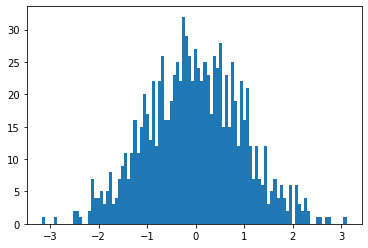

In [17]:
# plt.hist: 第二个参数bins指定共有几个条状图，默认为10
from matplotlib import pyplot as plt
import torch
plt.hist(torch.randn(1000).numpy(), 100);

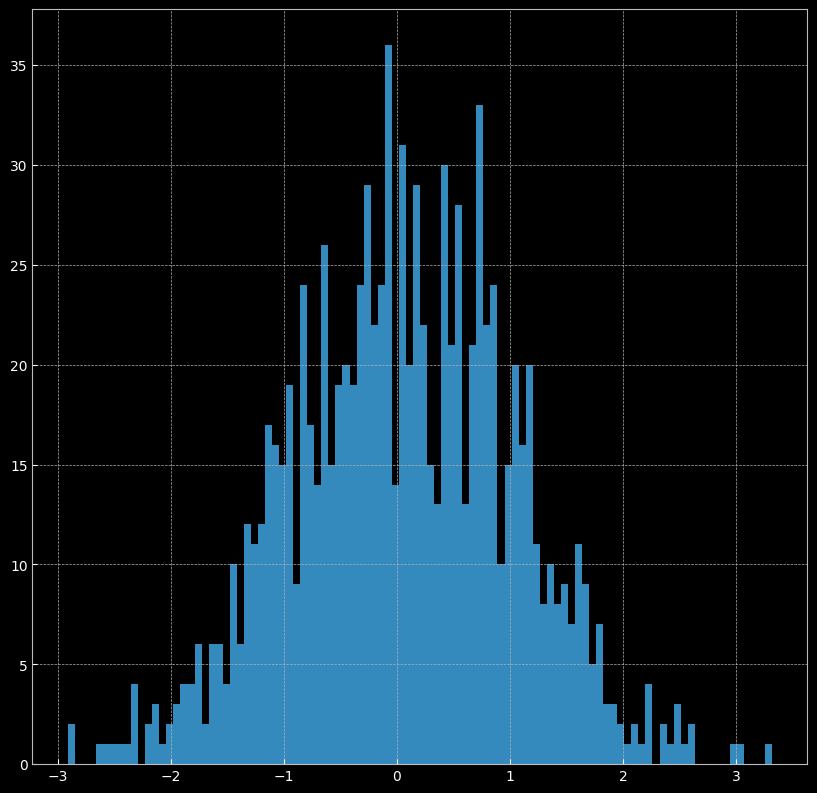

In [18]:
# 自定义res可视化库
from res.plot_lib import set_default
set_default()
plt.hist(torch.randn(1000).numpy(), 100);

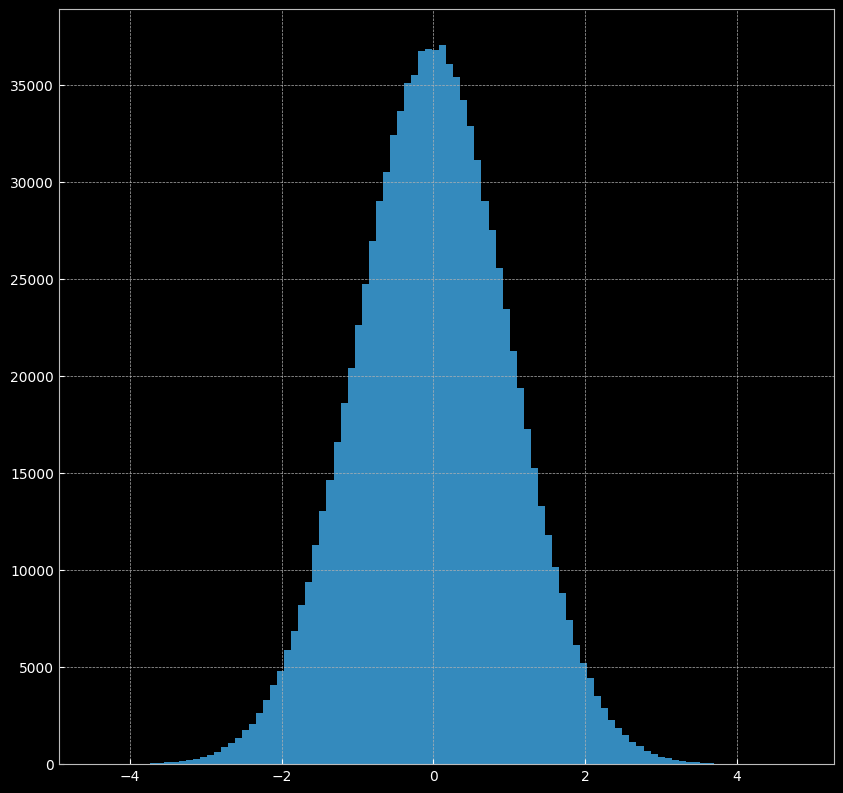

In [19]:
plt.hist(torch.randn(10**6).numpy(), 100); 

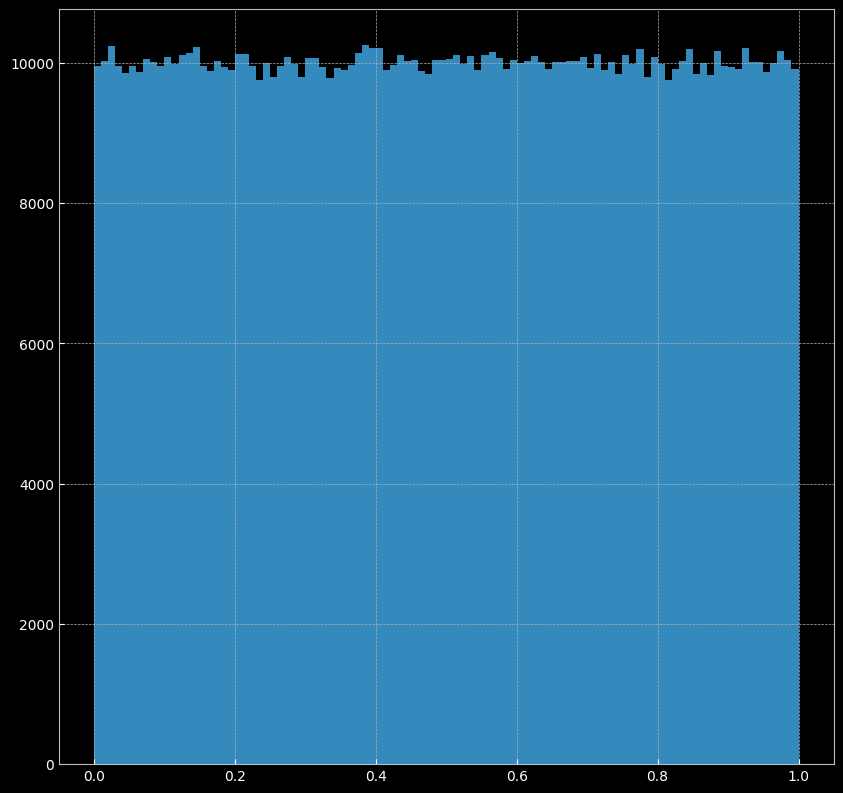

In [20]:
plt.hist(torch.rand(10**6).numpy(), 100);

### numpy

In [1]:
import numpy as np
## numpy版本以及配置
print(np.__version__)
# np.show_config()

1.19.5


In [2]:
a = np.arange(25).reshape((5,5))
print(a)
print(a[:, None])
print(a[:, None].shape)
print(a[:, :, None].shape)
print(a[..., None].shape)# 省略所有的冒号来用省略号代替

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
[[[ 0  1  2  3  4]]

 [[ 5  6  7  8  9]]

 [[10 11 12 13 14]]

 [[15 16 17 18 19]]

 [[20 21 22 23 24]]]
(5, 1, 5)
(5, 5, 1)
(5, 5, 1)


In [8]:
## 创建数组: np.zeros | np.arange
print(np.zeros((2,3))) # 这是一个null矩阵，可添加参数dtype=int指明类型
print(np.arange(10,50))
print(np.arange(9).reshape(3, 3))

[[0. 0. 0.]
 [0. 0. 0.]]
[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [2]:
# .ravel() 展成一维数组
a = np.zeros((2,3))
a.ravel()

array([0., 0., 0., 0., 0., 0.])

In [12]:
# np.zeros(shape, dtype)
# np.meshgrid
Z = np.zeros((5,5), [('x',float),('y',float)]) # 第二个参数是dtype
Z['x'], Z['y'] = np.meshgrid(np.linspace(0,1,5),
                             np.linspace(0,1,5))
print(Z)
print(Z.shape)

[[(0.  , 0.  ) (0.25, 0.  ) (0.5 , 0.  ) (0.75, 0.  ) (1.  , 0.  )]
 [(0.  , 0.25) (0.25, 0.25) (0.5 , 0.25) (0.75, 0.25) (1.  , 0.25)]
 [(0.  , 0.5 ) (0.25, 0.5 ) (0.5 , 0.5 ) (0.75, 0.5 ) (1.  , 0.5 )]
 [(0.  , 0.75) (0.25, 0.75) (0.5 , 0.75) (0.75, 0.75) (1.  , 0.75)]
 [(0.  , 1.  ) (0.25, 1.  ) (0.5 , 1.  ) (0.75, 1.  ) (1.  , 1.  )]]
(5, 5)


In [3]:
Z = np.zeros(10, [ ('position', [ ('x', float, 1),
                                  ('y', float, 1)]),
                   ('color',    [ ('r', float, 1),
                                  ('g', float, 1),
                                  ('b', float, 1)])])
print(Z)

[((0., 0.), (0., 0., 0.)) ((0., 0.), (0., 0., 0.))
 ((0., 0.), (0., 0., 0.)) ((0., 0.), (0., 0., 0.))
 ((0., 0.), (0., 0., 0.)) ((0., 0.), (0., 0., 0.))
 ((0., 0.), (0., 0., 0.)) ((0., 0.), (0., 0., 0.))
 ((0., 0.), (0., 0., 0.)) ((0., 0.), (0., 0., 0.))]
/home/yaoqf/miniconda3/envs/dynamicgcn/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  """


In [15]:
# 生成类高斯数组
# np.meshgrid
X, Y = np.meshgrid(np.linspace(-1,1,10), np.linspace(-1,1,10))
print(X.shape)
print(X)
print(Y.shape)
print(Y)
D = np.sqrt(X*X+Y*Y)
sigma, mu = 1.0, 0.0
G = np.exp(-( (D-mu)**2 / ( 2.0 * sigma**2 ) ) )

(10, 10)
[[-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
   0.33333333  0.55555556  0.77777778  1.        ]
 [-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
   0.33333333  0.55555556  0.77777778  1.        ]
 [-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
   0.33333333  0.55555556  0.77777778  1.        ]
 [-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
   0.33333333  0.55555556  0.77777778  1.        ]
 [-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
   0.33333333  0.55555556  0.77777778  1.        ]
 [-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
   0.33333333  0.55555556  0.77777778  1.        ]
 [-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
   0.33333333  0.55555556  0.77777778  1.        ]
 [-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
   0.33333333  0.55555556  0.77777778  1. 

In [14]:
# 数据类型
# dtype: 'float32', 'float64'
for dtype in [np.int8, np.int32, np.int64]:
    print(np.iinfo(dtype).min)
    print(np.iinfo(dtype).max)
for dtype in [np.float32, np.float64]:
    print(np.finfo(dtype).min)
    print(np.finfo(dtype).max)
    print(np.finfo(dtype).eps)

-128
127
-2147483648
2147483647
-9223372036854775808
9223372036854775807
-3.4028235e+38
3.4028235e+38
1.1920929e-07
-1.7976931348623157e+308
1.7976931348623157e+308
2.220446049250313e-16


In [3]:
# array和asarray都可以将结构数据转化为ndarray，但是主要区别就是当数据源是ndarray时，array仍然会copy出一个副本，占用新的内存，但asarray不会
a=[[1,2,3],[4,5,6],[7,8,9]]
b=np.array(a)
c=np.asarray(a)
a[2]=1 # np.array与np.asarray功能是一样的，都是将输入转为矩阵格式。当输入是列表的时候，更改列表的值并不会影响转化为矩阵的值
print(a)
print(b)
print(c)
print("list---------")
print("ndarray------")
a=np.random.random((3,3))
print(a.dtype)
b=np.array(a,dtype='float64')
c=np.asarray(a,dtype='float64')
a[2]=2
print(a)
print(b)
print(c)

[[1, 2, 3], [4, 5, 6], 1]
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]
list---------
ndarray------
float64
[[0.76642387 0.30638509 0.25181517]
 [0.17831494 0.63521877 0.21232494]
 [2.         2.         2.        ]]
[[0.76642387 0.30638509 0.25181517]
 [0.17831494 0.63521877 0.21232494]
 [0.85859225 0.37510162 0.90993765]]
[[0.76642387 0.30638509 0.25181517]
 [0.17831494 0.63521877 0.21232494]
 [2.         2.         2.        ]]


In [4]:
# array类型转为list类型 .tolist()
# .tolist是将数组转为list的格式，等同于np.array的反向，那什么情况下需要将np.ndarray转为list的格式呢？当需要序列化的时候(serialization)，由于np.ndarray是不可序列化的
a=np.random.random((3,3))
print(a.dtype)
b=a.tolist()
a[1]=2
print(a)
print(b)

float64
[[0.59321655 0.56008782 0.12349878]
 [2.         2.         2.        ]
 [0.92728738 0.2682036  0.42935502]]
[[0.5932165542118568, 0.5600878169954748, 0.12349877642531581], [0.4428831022608949, 0.543734083444816, 0.5880601744491496], [0.9272873757747849, 0.2682036011356066, 0.429355015325699]]


In [ ]:
# np.eye(3) | np.ones((10,10))
# np.full 构造一个数组，用指定值填充其元素
# np.empty 构造一个长度为 shape 的未初始化数组，这个数组的元素可能是内存位置上存在的任何数值

In [17]:
# np.linspace
Z = np.linspace(0,1,11,endpoint=False)[1:]
print(Z)
print(np.linspace(0,1,11,endpoint=False))
print(np.linspace(0,1,11))

[0.09090909 0.18181818 0.27272727 0.36363636 0.45454545 0.54545455
 0.63636364 0.72727273 0.81818182 0.90909091]
[0.         0.09090909 0.18181818 0.27272727 0.36363636 0.45454545
 0.54545455 0.63636364 0.72727273 0.81818182 0.90909091]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [5]:
# 原地更改数组
Z = np.arange(11)
Z[(3 < Z) & (Z < 8)] *= -1
print(Z)

[ 0  1  2  3 -4 -5 -6 -7  8  9 10]


In [7]:
# 更改数组类型
# np.random.rand
# np.random.uniform()
# .astype(np.float32) | .view(np.int32)
Z = (np.random.rand(10)*100).astype(np.float32)
print(Z)
Y = Z.view(np.int32)
print(Y)
print(Z)
Y[:] = Z
print(Y)

[41.426197 64.82094  30.93856  34.45048  21.383808 92.63415  70.02699
 54.725338 70.215324 55.811523]
[1109767277 1115792466 1106739756 1107938635 1101730314 1119437999
 1116474834 1113253567 1116499519 1113538304]
[41.426197 64.82094  30.93856  34.45048  21.383808 92.63415  70.02699
 54.725338 70.215324 55.811523]
[41 64 30 34 21 92 70 54 70 55]


In [ ]:
# 将一个数组的值都打印出来
np.set_printoptions(threshold=float("inf"))
Z = np.zeros((40,40))
print(Z)

In [10]:
# 打印数组的索引和对应的值，等价于enumerate
Z = np.arange(9).reshape(3,3)
for index, value in np.ndenumerate(Z):
    print(index, value)
print("*"*20)
for index in np.ndindex(Z.shape): # 还可以这样使用: np.ndindex(3, 2, 2)
    print(index, Z[index])

(0, 0) 0
(0, 1) 1
(0, 2) 2
(1, 0) 3
(1, 1) 4
(1, 2) 5
(2, 0) 6
(2, 1) 7
(2, 2) 8
********************
(0, 0) 0
(0, 1) 1
(0, 2) 2
(1, 0) 3
(1, 1) 4
(1, 2) 5
(2, 0) 6
(2, 1) 7
(2, 2) 8


In [7]:
# 创建对角矩阵
Z = np.diag(1+np.arange(4),k=0) # k值默认为0，若为负则在主对角线下方，若为正则在上方
print(Z)
Z = np.diag(1+np.arange(4),k=-1)
print(Z)
    # 当np.diag的输入是一个一维数组时，结果是以一维数组为对角线元素的矩阵，若输入是一个矩阵时，则输出矩阵的对角线元素
b = np.arange(1, 10).reshape(3, 3)
print(b)
print(np.diag(b))


[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]
[[0 0 0 0 0]
 [1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[1 5 9]


In [13]:
# 给定两个数组，创建柯西矩阵，即(Cij =1/(xi - yj))
# np.subtract.outer
# np.linalg.det: 矩阵求行列式
X = np.arange(8)
Y = X + 0.5
C = 1.0 / np.subtract.outer(X, Y)
print(np.linalg.det(C))

3638.1636371179666


In [ ]:
# np.linalg.inv()：矩阵求逆
# np.linalg.norm(x, ord):求范数，ord默认是二范数
# np.linalg.qr: 计算矩阵的QR分解。把矩阵A作为QR，q是正交的，r是上三角形

In [2]:
# 让一个矩阵的外围是1，内部是0
Z = np.ones((10,10))
Z[1:-1,1:-1] = 0
print(Z)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [3]:
# 给一个已经存在的矩阵加上以0值填充的外围: np.pad | 索引
Z = np.ones((5,5))
Z = np.pad(Z, pad_width=1, mode='constant', constant_values=0)
print(Z)

# Using fancy indexing
Z[:, [0, -1]] = 0
Z[[0, -1], :] = 0
print(Z)

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


In [2]:
# 得到一个棋盘模式的矩阵: 索引 | np.tile
Z = np.zeros((8,8),dtype=int)
Z[1::2,::2] = 1
Z[::2,1::2] = 1
print(Z)

Z = np.tile( np.array([[0,1],[1,0]]), (4,4)) # 将第一个参数数组沿着第二个参数指明的方向扩大，第二个参数只有一个数字，则默认是沿行的方向
print(Z)

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]
[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


In [3]:
# np.tile
Z = np.tile( np.array([[0,1],[1,0]]), 4) 
print(Z)

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


In [2]:
np.tile(np.array([1,0]), (4,1))

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0]])

In [12]:
Z = np.zeros((5,5))
Z += np.arange(5)
print(Z)

# without broadcasting
Z = np.tile(np.arange(0, 5), (5,1))
print(Z)

[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]
[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [14]:
# 从生成器函数创建数组
def generate():
    for x in range(10):
        yield x
Z = np.fromiter(generate(),dtype=float,count=1) # 参数count表示从数组缓冲区中读取的项目数，-1表示全部读取
print(Z)

[0.]


In [ ]:
# np.column_stack 按列合并
# np.row_stack 按行合并
# np.concatenate((a,b), axis=0)
# np.stack

In [4]:
# np.nan | np.inf
print(0 * np.nan)
print(np.nan == np.nan)
print(np.inf > np.nan)
print(np.nan - np.nan)
print(np.nan in set([np.nan]))
print(0.3 == 3 * 0.1)

nan
False
False
nan
True
False


In [6]:
# 让一个数组不可改变/只读
Z = np.zeros(10)
Z.flags.writeable = False
Z[0] = 1

ValueError: assignment destination is read-only

In [5]:
# 确定每个数组的内存大小
a = np.zeros((2,3))
print("%d x %d = %d bytes" % (a.size, a.itemsize, a.size * a.itemsize))

6 x 8 = 48 bytes


In [9]:
# 找非零元素的索引
nz = np.nonzero([1,2,0,0,4,0])
print(nz)

(array([0, 1, 4]),)


In [9]:
# np.unravel_index
print(np.unravel_index(99,(6,7,8))) # 考虑一个形如(6,7,8)的数组，确定第100个元素的索引

(1, 5, 3)


In [5]:
# 找点与点之间的距离
    # 方法1: np.atleast_2d
    # 方法2: scipy.spatial
Z = np.random.random((10,2))
X,Y = np.atleast_2d(Z[:,0], Z[:,1]) # 将输入的数组转换成至少两维
D = np.sqrt( (X-X.T)**2 + (Y-Y.T)**2)
print(D)

# Much faster with scipy
import scipy.spatial
D = scipy.spatial.distance.cdist(Z,Z)
print(D)

[[0.         0.30981757 0.57406908 1.15490125 0.82140475 0.49343794
  0.85293249 0.71396395 0.57585099 0.07538335]
 [0.30981757 0.         0.37578479 0.94954023 0.52502209 0.29975812
  0.87667925 0.54860667 0.34008686 0.35974213]
 [0.57406908 0.37578479 0.         0.58606352 0.37336278 0.08209262
  0.62485338 0.17568912 0.07909523 0.57835106]
 [1.15490125 0.94954023 0.58606352 0.         0.59085856 0.66814807
  0.76685895 0.44552102 0.60945515 1.14947542]
 [0.82140475 0.52502209 0.37336278 0.59085856 0.         0.40712027
  0.96789164 0.44836561 0.30856153 0.85369078]
 [0.49343794 0.29975812 0.08209262 0.66814807 0.40712027 0.
  0.64505915 0.24901835 0.10071641 0.50067579]
 [0.85293249 0.87667925 0.62485338 0.76685895 0.96789164 0.64505915
  0.         0.52154029 0.70390339 0.79888769]
 [0.71396395 0.54860667 0.17568912 0.44552102 0.44836561 0.24901835
  0.52154029 0.         0.23820374 0.70477089]
 [0.57585099 0.34008686 0.07909523 0.60945515 0.30856153 0.10071641
  0.70390339 0.23820

In [4]:
# np.atleast_2d
np.atleast_2d(1, [1, 2], [[1, 2]])

[array([[1]]), array([[1, 2]]), array([[1, 2]])]

In [1]:
# np.random.random((3,3,3))
# 归一化
    Z = np.random.random((5,5))
    Z = (Z - np.mean (Z)) / (np.std (Z))

# np.random.shuffle
# 打乱顺序
import numpy as np
idx = list(range(5))
np.random.shuffle(idx)
print(idx)

import random
a = [1,5,2,3,4]
random.shuffle(a)
print(a)

[4, 1, 0, 2, 3]
[3, 5, 1, 2, 4]


In [18]:
# np.random.uniform
# 找某个向量中与给定向量元素差值最小的元素值
Z = np.arange(100)
v = np.random.uniform(0,100)
index = (np.abs(Z-v)).argmin()
print(Z[index])

78


In [7]:
# 从笛卡尔坐标转换成极坐标
Z = np.random.random((10,2))
X,Y = Z[:,0], Z[:,1]
R = np.sqrt(X**2+Y**2)
T = np.arctan2(Y,X)
print(R)
print(T)

[0.66998888 1.2965928  0.93360878 0.68206245 0.9968436  0.89236474
 0.99091895 0.75422003 0.69421704 0.93410525]
[1.2848821  0.70351765 0.74517562 1.23755762 0.64729273 1.26165083
 0.504588   0.44955925 0.86963437 1.47673894]


In [9]:
# 替换最大值
Z = np.random.random(10)
print(Z)
Z[Z.argmax()] = 0
print(Z)

[0.85197468 0.14359269 0.66204207 0.8163523  0.80379989 0.24117041
 0.67305811 0.49457476 0.85976403 0.19293299]
[0.85197468 0.14359269 0.66204207 0.8163523  0.80379989 0.24117041
 0.67305811 0.49457476 0.         0.19293299]


In [16]:
# np.random.choice(a, size=None, replace=True, p=None)
    # 从数组中随机抽取元素
    # 从a(只要是ndarray都可以，但必须是一维的)中随机抽取数字，并组成指定大小(size)的数组
    # replace:True表示可以取相同数字，False表示不可以取相同数字
    # 与数组a相对应，表示取数组a中每个元素的概率，默认为选取每个元素的概率相同
# np.put(a, ind, v): 替换值，第一个参数表示目标数组，第二个参数表示目标索引，第三个参数表示要替换的值
n = 10
p = 3
Z = np.zeros((n,n))
np.put(Z, np.random.choice(range(n*n), p, replace=False),1)
print(Z)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [11]:
# np.random.uniform
Z = np.random.uniform(-10,+10,10)
print(Z)
print(np.copysign(np.ceil(np.abs(Z)), Z))

# 或者
print(np.where(Z>0, np.ceil(Z), np.floor(Z)))

[ 8.40075143  0.82053244 -5.6202243   9.20897539 -1.37355607 -1.74431653
 -4.78169784 -3.80061955 -7.83071834 -0.87553202]
[ 9.  1. -6. 10. -2. -2. -5. -4. -8. -1.]
[ 9.  1. -6. 10. -2. -2. -5. -4. -8. -1.]


In [11]:
# 得到数组每个元素的整数部分
Z = np.random.uniform(0,10,10)
print(Z)
print(Z - Z%1)
print(Z // 1)
print(np.floor(Z))
print(Z.astype(int))
print(np.trunc(Z))

[5.14404168 1.97897059 8.38653561 9.2737273  1.92440973 8.58379532
 7.45066443 0.13041476 2.21465363 9.66850459]
[5. 1. 8. 9. 1. 8. 7. 0. 2. 9.]
[5. 1. 8. 9. 1. 8. 7. 0. 2. 9.]
[5. 1. 8. 9. 1. 8. 7. 0. 2. 9.]
[5 1 8 9 1 8 7 0 2 9]
[5. 1. 8. 9. 1. 8. 7. 0. 2. 9.]


In [9]:
# np.copysign: 将第一个参数的值保留，符号用第二个参数替代
print(np.copysign([-1, 0, 1], -1.1))

[-1. -0. -1.]


In [13]:
# np.random.randint
# np.intersect1d: 找两个数组的共有的值
Z1 = np.random.randint(0,10,10)
Z2 = np.random.randint(0,10,10)
print(Z1)
print(Z2)
print(np.intersect1d(Z1,Z2))

[0 8 5 4 0 1 9 5 8 5]
[4 1 0 9 6 6 0 8 4 6]
[0 1 4 8 9]


In [19]:
# 数组比较
# np.random.randint
A = np.random.randint(0,2,5)
B = np.random.randint(0,2,5)
print(A)

# Assuming identical shape of the arrays and a tolerance for the comparison of values
equal = np.allclose(A,B) # 比较两个array是不是每一元素都相等，默认在1e-05的误差范围内
print(equal)

# Checking both the shape and the element values, no tolerance (values have to be exactly equal)
equal = np.array_equal(A,B)
print(equal)

[1 1 1 1 0]
False
False


In [20]:
# 排序: 按列排序
# .argsort()
Z = np.random.randint(0,10,(3,3))
print(Z)
print(Z[Z[:,1].argsort()])


[[8 9 7]
 [4 0 9]
 [1 9 9]]
[[4 0 9]
 [8 9 7]
 [1 9 9]]


In [21]:
# 判断一个二维数组有空的列
# .any()
Z = np.random.randint(0,3,(3,10))
print((~Z.any(axis=0)).any())

False


In [21]:
# numpy.where() 有两种用法：
# 1、np.where(condition, x, y)：满足条件(condition)，输出x，不满足输出y
# 2、np.where(condition)：只有条件 (condition)，没有x和y，则输出满足条件 (即非0) 元素的坐标 (等价于numpy.nonzero)。这里的坐标以tuple的形式给出，通常原数组有多少维，输出的tuple中就包含几个数组，分别对应符合条件元素的各维坐标。
aa = np.arange(10)
print(np.where(aa > 5,1,-1))
print(np.where(aa > 5)) # 返回索引



[-1 -1 -1 -1 -1 -1  1  1  1  1]
(array([6, 7, 8, 9]),)


In [2]:
# 值裁剪
a=np.array([1,3,79,3])
print(np.clip(a,3,8))

[3 3 8 3]


In [ ]:
# 自定义数据类型
    # 如定义一个类型将颜色描述成四个无符号字节unsigned bytes
color = np.dtype([("r", np.ubyte),
                  ("g", np.ubyte),
                  ("b", np.ubyte),
                  ("a", np.ubyte)])

In [ ]:
# np.pi
# np.cos
# np.sin
# np.sign
# np.log
# np.abs
# np.triu
# np.tril

In [6]:
# 求和: sum
print(sum(range(5),-1)) # 后一个参数指定初始值，这是python自带的sum函数
from numpy import *
print(sum(range(5),-1)) # numpy中的sum函数中第二个参数为axis，若要指定初始值则要使用initial参数

9
10


In [3]:
# 求和: 比np.sum更快的np.add.reduce
Z = np.arange(10)
np.add.reduce(Z)

45

In [18]:
# 减去矩阵每一行的均值
X = np.random.rand(5, 10)
print(X)
Y = X - X.mean(axis=1, keepdims=True)
print(Y)
print(X.mean(axis=1, keepdims=True).shape)

[[5.28002266e-01 2.46436442e-01 1.76467884e-01 5.61311042e-01
  7.33211696e-01 6.71763119e-01 6.71878263e-01 4.07947734e-01
  6.34071572e-01 9.20631229e-01]
 [8.87651299e-01 3.54607414e-01 6.53575114e-01 9.01982445e-01
  3.66474794e-01 4.18496438e-02 3.69007998e-01 9.76194301e-01
  9.87506553e-01 7.57044344e-01]
 [4.22187259e-01 8.93332606e-01 5.97849399e-01 6.44016693e-01
  9.10890277e-01 4.39983290e-01 8.58749088e-02 9.00693420e-01
  3.98326943e-01 4.26731261e-04]
 [2.16038002e-01 8.95139404e-02 4.37431615e-01 6.89930989e-01
  8.42955968e-02 3.23496498e-01 5.76987287e-02 7.18298561e-01
  5.55119510e-01 9.98174017e-01]
 [2.64214620e-01 5.56893157e-02 5.02642405e-01 1.98351319e-02
  1.59900218e-01 3.61791041e-01 5.74073987e-01 5.95130555e-01
  7.94910034e-01 1.89269222e-01]]
[[-0.02716986 -0.30873568 -0.37870424  0.00613892  0.17803957  0.11659099
   0.11670614 -0.14722439  0.07889945  0.3654591 ]
 [ 0.25806191 -0.27498198  0.02398572  0.27239305 -0.2631146  -0.58773975
  -0.26058139  

In [4]:
# 矩阵乘法: np.dot | @
Z = np.dot(np.ones((5,3)), np.ones((3,2)))
print(Z)

# Alternative solution, in Python 3.5 and above
Z = np.ones((5,3)) @ np.ones((3,2))
print(Z)

[[3. 3.]
 [3. 3.]
 [3. 3.]
 [3. 3.]
 [3. 3.]]
[[3. 3.]
 [3. 3.]
 [3. 3.]
 [3. 3.]
 [3. 3.]]


In [7]:
# 除法
print(np.array(0) / np.array(0))
print(np.array(0) // np.array(0))
print(np.array([np.nan]).astype(int).astype(float))

nan
0
[-9.22337204e+18]
/home/yaoqf/miniconda3/envs/dynamicgcn/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/yaoqf/miniconda3/envs/dynamicgcn/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in floor_divide
  


In [6]:
# 开方
print(np.sqrt(-1))
print(np.emath.sqrt(-1))

nan
1j
/home/yaoqf/miniconda3/envs/dynamicgcn/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


In [4]:
# np.binary_repr: 得到对应数值的二进制表示
# np.invert: 对数值按位取反
print(list(np.binary_repr(4, width=8)))

['0', '0', '0', '0', '0', '1', '0', '0']


In [9]:
# 原地进行计算
A = np.ones(3)*1
B = np.ones(3)*2
print(A,B)
np.add(A,B,out=B)
print(B)
np.divide(A,2,out=A)
print(A)
np.negative(A,out=A)
print(A)
np.multiply(A,B,out=A)
print(A)

[1. 1. 1.] [2. 2. 2.]
[3. 3. 3.]
[0.5 0.5 0.5]
[-0.5 -0.5 -0.5]
[-1.5 -1.5 -1.5]


In [7]:
# 日期
yesterday = np.datetime64('today') - np.timedelta64(1)
today     = np.datetime64('today')
tomorrow  = np.datetime64('today') + np.timedelta64(1)
print(yesterday)
print(today)
print(tomorrow)

2021-06-14
2021-06-15
2021-06-16


In [8]:
# 得到一个月的所有日期
Z = np.arange('2016-07', '2016-08', dtype='datetime64[D]')
print(Z)

['2016-07-01' '2016-07-02' '2016-07-03' '2016-07-04' '2016-07-05'
 '2016-07-06' '2016-07-07' '2016-07-08' '2016-07-09' '2016-07-10'
 '2016-07-11' '2016-07-12' '2016-07-13' '2016-07-14' '2016-07-15'
 '2016-07-16' '2016-07-17' '2016-07-18' '2016-07-19' '2016-07-20'
 '2016-07-21' '2016-07-22' '2016-07-23' '2016-07-24' '2016-07-25'
 '2016-07-26' '2016-07-27' '2016-07-28' '2016-07-29' '2016-07-30'
 '2016-07-31']


In [8]:
# 读写
# io.StringIO
# np.genfromtxt
from io import StringIO

# Fake file
s = StringIO('''1, 2, 3, 4, 5

                6,  ,  , 7, 8

                 ,  , 9,10,11
''')
Z = np.genfromtxt(s, delimiter=",", dtype=np.int)
print(Z)

[[ 1  2  3  4  5]
 [ 6 -1 -1  7  8]
 [-1 -1  9 10 11]]
/home/yaoqf/miniconda3/envs/dynamicgcn/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]


In [ ]:
# np.savez_compressed("xxx.npz", data)
# np.load(filepath)["arr_0"].astype(np.long)

In [3]:
# np.bincount
import numpy as np
x=np.array([0,1,1,3,2,1,7]) 
np.bincount(x) # 统计每个索引值出现的次数

array([1, 3, 1, 1, 0, 0, 0, 1])

### pandas

In [ ]:
# 扩展Pandas中显示的列和行数
## Pandas表中显示的行和列数量有限，可以根据自己的喜好进行自定义。
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [ ]:
# for idx, row in df.iterrows()

In [4]:
# pandas.read_excel(path, 'sheet1')
import pandas as pd
data_path = 'test/test_pd/test.txt'
sparse_features = ['C' + str(i) for i in range(1, 27)]
dense_features = ['I' + str(i) for i in range(1, 14)]
column_names = ['label']+dense_features+sparse_features 
data = pd.read_csv(data_path, sep='\t', header=None, names=column_names) # 参数chunksize可按块读取，之后存放到到列表中再使用pd.concat(axis=0)连接起来
data

,label,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26
0,0,1.0,1,5.0,0.0,1382,4.0,15,2,181,...,e5ba7672,f54016b9,21ddcdc9,b1252a9d,07b5194c,NaN,3a171ecb,c5c50484,e8b83407,9727dd16
1,0,2.0,0,44.0,1.0,102,8.0,2,2,4,...,07c540c4,b04e4670,21ddcdc9,5840adea,60f6221e,NaN,3a171ecb,43f13e8b,e8b83407,731c3655
2,0,2.0,0,1.0,14.0,767,89.0,4,2,245,...,8efede7f,3412118d,NaN,NaN,e587c466,ad3062eb,3a171ecb,3b183c5c,NaN,NaN
3,0,NaN,893,NaN,NaN,4392,NaN,0,0,0,...,1e88c74f,74ef3502,NaN,NaN,6b3a5ca6,NaN,3a171ecb,9117a34a,NaN,NaN
4,0,3.0,-1,NaN,0.0,2,0.0,3,0,0,...,1e88c74f,26b3c7a7,NaN,NaN,21c9516a,NaN,32c7478e,b34f3128,NaN,NaN


In [5]:
data['I1'].fillna(0,)

0    1.0
1    2.0
2    2.0
3    0.0
4    3.0
Name: I1, dtype: float64

In [12]:
# pd.get_dummies 实现one-hot
df = pd.DataFrame([  
            ['green' , 'A'],   
            ['red'   , 'B'],   
            ['blue'  , 'A']])  

df.columns = ['color',  'class'] 
pd.get_dummies(df) 

,color_blue,color_green,color_red,class_A,class_B
0,0,1,0,1,0
1,0,0,1,0,1
2,1,0,0,1,0


In [7]:
# df.head() # 默认返回前5行数据
# df.sample
import pandas as pd
df = pd.DataFrame({'name':['zhao','qian','sun','wang'],'mark':[150,122,155,132],'gender':['female','female','male','male']})
print(df)
print(df.head(1))
print(df.sample(2))
print(df.sample(frac=0.75))

   name  mark  gender
0  zhao   150  female
1  qian   122  female
2   sun   155    male
3  wang   132    male
   name  mark  gender
0  zhao   150  female
   name  mark  gender
0  zhao   150  female
2   sun   155    male
   name  mark  gender
2   sun   155    male
1  qian   122  female
3  wang   132    male


In [11]:
# .index | .iloc[]
# df.loc[df.user_id == u_id]
# df.iat[0,1] 第一个参数为行索引，第二个为列索引
print(df.index)
print(len(df.index))
print(df.iloc[2])

RangeIndex(start=0, stop=4, step=1)
4
name       sun
mark       155
gender    male
Name: 2, dtype: object


In [ ]:
# df.to_numpy()
# pd.DataFrame.from_dict
    # orient可选值为'columns', 'index'，默认是前者，若为'index'，则将key作为索引

In [ ]:
# df.dropna(inplace=True) 能够找到DataFrame类型数据的空值（缺失值），将空值所在的行/列删除后，将新的DataFrame作为返回值返回
    # 参数how: 筛选方式。‘any’，表示该行/列只要有一个以上的空值，就删除该行/列；‘all’，表示该行/列全部都为空值，就删除该行/列。
    # axis=1为列，默认为行
# df.fillna(): 填充缺失值；仅运行该语句原对象不变，还需要赋值

In [ ]:
# df.apply()

In [ ]:
# df.sort_values(by='time', ascending=True) 其中time是列名
    # df.sort_values(by=['user_id', 'time'], ascending=[True, True])
# df.reset_index(drop=True) drop=True表示把原来的索引index列去掉，重置index

In [ ]:
# 获取数据可以是df['time']或df.time
# df.time.unique()
# df.time.nunique()

In [ ]:
# new_df = pd.DataFrame()
# new_df = new_df.append(df, ignore_index=True)

In [ ]:
# data[['xx', 'xxx', 'xxxx']]
# data[(data['xxx']==12)&(data['xx']>5)]

In [ ]:
# pd.concat([df1, df2], axis=0, ignore_index=True)  垂直叠加，ignore_index默认为False，为True即重新排列索引

### sklearn

In [ ]:
from sklearn import KMeans
# kmeans = KMeans(n_clusters).fit(embeddings)
# kmeans.labels_

In [ ]:
# from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import log_loss, roc_auc_score


### scipy

In [2]:
import scipy.sparse as sp
# Dictionary of keys(DOK)
a = sp.dok_matrix((3, 10))
a[1, 2] = 2
a[2, 2] = 2
a[2, 3] = 1
a[2, 4] = 3
print(a)
print('---------------------')
print(a[2])
print('---------------------')
print(a[2].nonzero()[1])
print(a[2].nonzero())
print(a[2].values())
print('====================')

  (1, 2)	2.0
  (2, 2)	2.0
  (2, 3)	1.0
  (2, 4)	3.0
---------------------
  (0, 2)	2.0
  (0, 3)	1.0
  (0, 4)	3.0
---------------------
[2 3 4]
(array([0, 0, 0], dtype=int32), array([2, 3, 4], dtype=int32))
dict_values([2.0, 1.0, 3.0])


In [3]:
a.keys()

dict_keys([(1, 2), (2, 2), (2, 3), (2, 4)])

In [ ]:
# scipy.linalg.lu: LU分解：将矩阵A分解成一个下三角矩阵L和一个上三角矩阵U的乘积 A=LU，称为对矩阵A的LU分解

### math

In [ ]:
# int(math.floor/ceil)
# math.log2 was introduced in Python 3.3，会出现问题: AttributeError: 'module' object has no attribute 'log2'
    # 在早期的版本中可使用math.log(num, 2)

### nltk

In [ ]:
# nltk.download('xxx', download_dir)
# nltk.data.path: list
# from nltk.corpus import reuters
# from nltk.corpus import stopwords
# from nltk import word_tokenize
    # word_tokenize（str_text)

### 神经元和神经网络实现

In [ ]:
'''
线性回归/逻辑回归
or/and 神经元
xor
'''

In [15]:
# Define two vectors (lists): input my_x, weights my_w
my_x = [0, 1, 1]
my_w = [-10, 10, 5]

In [16]:
# Multiply two lists element wise
def mul(a, b):
    """
    return a list c, same length as a, element c[i] = a[i] * b[i]
    "len(list)" and "[0] * n" may be useful
    """
    n = len(a)
    c = [0] * n
    for i in range(n):
        c[i] = a[i] * b[i]
    return c

In [17]:
# Test mul() function
mul(my_x, my_w)

[0, 10, 5]

In [18]:
# Define a scalar: bias b
my_b = -5

In [19]:
# Neuron linear (internal) potential
def linear_neuron(x, weights, bias):
    """
    return a scalar value representing a scalar neuron
    "sum(list)" computes the sum of the elements in a list
    """
    return sum(mul(x, weights))+bias

In [20]:
# Test linear_neuron() function
linear_neuron(my_x, my_w, my_b)

10

In [21]:
# Import exp() function (safe on lists)
from numpy import exp

In [22]:
# Logistic sigmoid
def sigmoid(z):
    """
    return the logistic sigmoid (use exp())
    """
    return 1/(1+exp(-z))

In [23]:
# Try out σ() for different z values
for z in (-5, 0, 5): print(sigmoid(z))

0.0066928509242848554
0.5
0.9933071490757153


In [24]:
# Import some plotting stuff to graph sigmoid()
from numpy import linspace
from matplotlib.pyplot import plot, axhline, axvline, grid, style
style.use('dark_background')

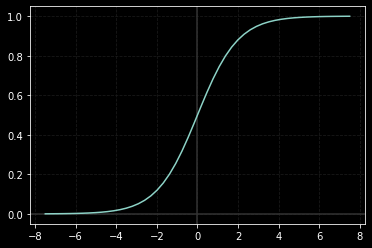

In [25]:
# Get a pair of axis and grid lines centred in (0, 0)
axhline(c='.2'); axvline(color='.2')
grid(c='.1', ls='--')

# Plot across a span of numbers
z = linspace(-7.5, 7.5)
plot(z, sigmoid(z))

In [26]:
# Full neuron function
def neuron(x, weights, bias):
    """
    Return a classical neuron output (reuse code above)
    """
    return sigmoid(sum(mul(x, weights))+bias)

In [27]:
# Test neuron() function
neuron(my_x, my_w, my_b)

0.9999546021312976

In [28]:
def or_neuron(x):
    """
    Return x1 OR x2 (x1 + x2)
    """
    return x[0] or x[1] 

In [29]:
# Defina a collection of inputs to test OR and AND
my_x_collection = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
]

In [30]:
print('Checking OR neuron output')
for my_x in my_x_collection:
    print(my_x, f'{or_neuron(my_x):.3f}')

Checking OR neuron output
[0, 0] 0.000
[0, 1] 1.000
[1, 0] 1.000
[1, 1] 1.000


In [31]:
# Package AND neuron weights and bias
def and_neuron(x):
    """
    Return x1 AND x2 (x1 * x2)
    """
    return x[0] and x[1]

In [32]:
print('Checking AND neuron output')
for my_x in my_x_collection:
    print(my_x, f'{and_neuron(my_x):.3f}')

Checking AND neuron output
[0, 0] 0.000
[0, 1] 0.000
[1, 0] 0.000
[1, 1] 1.000


In [33]:
def not_neuron(x):
    """
    Return NOT x1 (x1_)
    """
    return not x[0]

In [34]:
print('Checking NOT neuron output')
for my_x in [[0], [1]]:
    print(my_x, f'{not_neuron(my_x):.3f}')

Checking NOT neuron output
[0] 1.000
[1] 0.000


In [35]:
# Combine OR, AND, and NOT into a XOR neuron
def xor_neuron(x):
    """
    Return x1_ * x2 + x1 * x2_
    """
    return (not x[0]) and x[1] or x[0] and (not x[1])

In [36]:
print('Checking XOR neuron output')
for my_x in my_x_collection:
    print(my_x, f'{xor_neuron(my_x):.3f}')

Checking XOR neuron output
[0, 0] 0.000
[0, 1] 1.000
[1, 0] 1.000
[1, 1] 0.000


### tensorflow

In [ ]:
# 模型网络继承object，入口函数是build()，在该函数下创建所有的训练和测试的所需要的操作
# build()
    # build_placeholder
    # build_inputs: 输入特征和标签
    # build_model: 嵌入层+DNN层+预测层
        # 每一层需要with tf.variable_scope() as scope: 这个函数返回上下文管理器，用于定义创建变量(或层)的操作